In [137]:
# 필요 모듈
import pandas as pd
import numpy as np
import random

# 여러변수 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

**데이터 프레임 병합**
- pandas는 두개 이상의 데이터 프레임을 하나로 합치는 병합(merge)과 연결(concate)을 지원

**merge명령을 사용한 df병합**
- merge:
    - 두개의 df의 공통 열이나 인덱스를 기준으로 두개의 df를 합침
    - 이때, 기준이 되는 열데이터를 key라고 부름
    
- 형식
    - df.merge(df1) : 두df를 병합
    - 기본은 inner join : 양쪽 동일하게 존재하는 키만 표시
    - key :기준열을 의미(실제 데이터 필드거나 행 인덱스 일 수 있음)

- 병합 방식
    - inner join : 양쪽 df에서 모두 키가 존재하는 data만 표시
    - outer join : 한쪽에만 키가 존재하면 data를 표시
    - how=inner(생략가능), how = outer

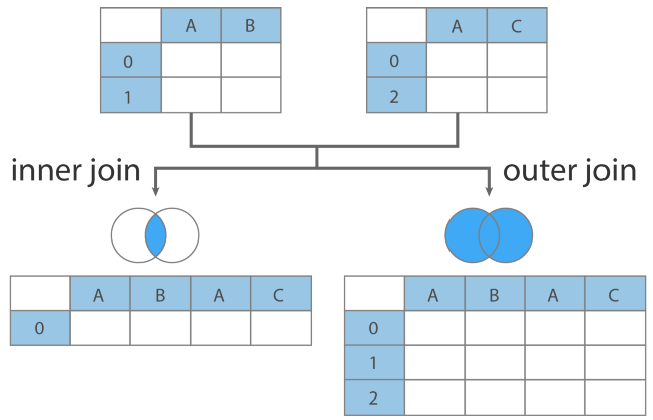

In [144]:
# 예시 df생성 (고객정보를 담고 있는 df)
df1 = pd.DataFrame({
    '고객번호':[1001,1002,1003,1004,1005,1006,1007],
    '이름':['둘리','도우너','또치','길동','희동','마이콜','영희']
}, columns=['고객번호','이름'])

df1

,고객번호,이름
0,1001,둘리
1,1002,도우너
2,1003,또치
3,1004,길동
4,1005,희동
5,1006,마이콜
6,1007,영희


In [145]:
# 예시 df2생성 (예금정보를 담고 있는 df)
df2 = pd.DataFrame({
    '고객번호':[1001,1001,1005,1006,1008,1001],
    '금액':[10000,20000,15000,5000,100000,30000]
}, columns=['고객번호','금액'])
df2

,고객번호,금액
0,1001,10000
1,1001,20000
2,1005,15000
3,1006,5000
4,1008,100000
5,1001,30000


## 1. inner join
- merge명령으로 두 df를 병합하는 문법
    - 모든 인수 생략(병합df를 제외한) 공통이름을 갖고 있는 열
    - 고객번호가 키가 됨
    - 양쪽에 모두 존재하는 key의 data만 보여주는 inner join 방식을 사용

In [147]:
# 두 df의 공통열(같은 이름을 갖는 컬럼) : 고객번호
df1.merge(df2) #key= 생략하면 공통열을 기준으로 inner join실행
pd.merge(df1,df2)

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


## 2. outer join방식
    - key값이 한쪽에만 있어도 데이터를 보여줌
    - pd.merge(df1,df2, how='outer')
    - 어느 한 df에 데이터가 존재하지 않으면 NaN로 표시됨 

In [149]:
pd.merge(df1,df2,how='outer') #공통열인 고객번호를 기준열로 병합 진행

# 1002,1003,1004,1007번 고객은 은행의 회원이긴하지만 예금하지 않은 고객
# 1008번 고객은 예금은 했지만 이름을 수집하지 않음 

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN
9,1008,NaN,100000.0


- how =inner/outer/left/right
    - how = left : 왼쪽 df에 있는 모든 키의 데이터는 표시
    - how = right : 오른쪽 df에 있는 모든 키의 데이터는 표시

In [151]:
pd.merge(df1,df2,how='left')
pd.merge(df1,df2,how='right')

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN


,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1005,희동,15000
3,1006,마이콜,5000
4,1008,NaN,100000
5,1001,둘리,30000


- 동일한 키 값이 있는 경우
    - 키 값이 같은 데이터가 여러개 있는 경우에는 있을 수 있는 모든 경우의 수를 따져서조합을 만듦

In [155]:
# 예제 df생성
df1=pd.DataFrame({
    '품종':['setosa','setosa','virginica','virginica'],
    '꽃잎길이':[1.4,1.3,1.5,1.3]
}, columns=['품종','꽃잎길이'])
df1

df2=pd.DataFrame({
    '품종':['setosa','virginica','virginica','ersicolor'],
    '꽃잎너비':[0.4,0.3,0.5,0.3]
}, columns=['품종','꽃잎너비'])
df2

,품종,꽃잎길이
0,setosa,1.4
1,setosa,1.3
2,virginica,1.5
3,virginica,1.3


,품종,꽃잎너비
0,setosa,0.4
1,virginica,0.3
2,virginica,0.5
3,ersicolor,0.3


- df1과 df2를 병합
    - 위 데이터에서는 키 값 setosa에 대해
        - df1에는 1.4와 1.3 2개의 데이터가 있고
        - df2에는 0.4라는 1개의 데이터가 있으므로
        - 병합 데이터에는 setosa가 (1.4,0.4)(1.3,0.4)의 2경우가 표현됨

    - 키 값 virginica의 경우 df1에 2개 df2에 2개 데이터가 있으므로
        - 2개 2개 조합에 의해 4개의 데이터가 표현됨 

In [156]:
pd.merge(df1,df2) #inner join

,품종,꽃잎길이,꽃잎너비
0,setosa,1.4,0.4
1,setosa,1.3,0.4
2,virginica,1.5,0.3
3,virginica,1.5,0.5
4,virginica,1.3,0.3
5,virginica,1.3,0.5


# 3. key
    - 두 데이터 프레임에서 이름이 같은 열은 모두 키가 될 수 있음
    - 이름이 같아도 키가 되면 안되는 열이 있으면 on 인수로 기준열을 명시해야 함

In [160]:
# 예제 df
df1 = pd.DataFrame({
    '고객명':['춘향','춘향','몽룡'],
    '날짜':['2018-01-01','2018-01-02','2018-01-01'],
    '데이터':[20000,30000,100000]
})
df1

df2 = pd.DataFrame({
    '고객명':['춘향','몽룡'],
    '데이터':['여자','남자']
})
df2


# 두 df에 같은 이름의 컬럼이 있음
# 단, 데이터 컬럼은 값의 의미가 다름(키로 사용되면 안됨)

,고객명,날짜,데이터
0,춘향,2018-01-01,20000
1,춘향,2018-01-02,30000
2,몽룡,2018-01-01,100000


,고객명,데이터
0,춘향,여자
1,몽룡,남자


- 기준열을 직접 지정 : on=기준열 이름
    - 반환 결과에 동일 필드명이 있을 경우 필드명_x, 필드명_y로 표현됨

In [162]:
# 기준열을 직접 지정
# 반환 결과에 동일 필드명이 있을 경우 필드명_x, 필드명_y로 표현됨

pd.merge(df1,df2, on='고객명') #inner
df1.merge(df2,on='고객명',how='outer')

,고객명,날짜,데이터_x,데이터_y
0,춘향,2018-01-01,20000,여자
1,춘향,2018-01-02,30000,여자
2,몽룡,2018-01-01,100000,남자


,고객명,날짜,데이터_x,데이터_y
0,춘향,2018-01-01,20000,여자
1,춘향,2018-01-02,30000,여자
2,몽룡,2018-01-01,100000,남자


## 4. 같은 이름의 열이 없는 경우
- 키가 되는 기준열이 두 df에서 다르게 나타나면 left_on, right_on 인수를 이용해 기준열을 설정해야 함 

In [165]:
df1=pd.DataFrame({
    '이름':['영희','철수','철수'],
    '국어성적':[90,80,80]
})
df1

df2=pd.DataFrame({
    '성명':['영희','영희','철수'],
    '수학성적':[100,80,90]
})
df2

,이름,국어성적
0,영희,90
1,철수,80
2,철수,80


,성명,수학성적
0,영희,100
1,영희,80
2,철수,90


In [166]:
# 양쪽 df의 기준이 되는 열의 이름이 다름
pd.merge(df1,df2,left_on='이름',right_on='성명')

# 출력 결과는 양쪽 필드명이 다르기 때문에 기준열로 설정한 두 필드 모두 반환

,이름,국어성적,성명,수학성적
0,영희,90,영희,100
1,영희,90,영희,80
2,철수,80,철수,90
3,철수,80,철수,90


- 일반 데이터 열이 아닌 인덱스를 기준으로 merge할 수 있음
    - left_index= True
    - right_index = True

In [168]:
df1 = pd.DataFrame({
    '도시':['서울','서울','서울','부산','부산'],
    '연도':[2000,2005,2010,2000,2005],
    '인구':[9853972,9762546,9631482,3655437,3512547]
})
df2 = pd.DataFrame(
    np.arange(12).reshape((6,2)),
    index=[['부산','부산','서울','서울','서울','서울'],
           [2000,2005,2000,2005,2010,2015]],
    columns=['데이터1','데이터2']
)

df1
df2

,도시,연도,인구
0,서울,2000,9853972
1,서울,2005,9762546
2,서울,2010,9631482
3,부산,2000,3655437
4,부산,2005,3512547


데이터1  데이터2
부산 2000     0     1
   2005     2     3
서울 2000     4     5
   2005     6     7
   2010     8     9
   2015    10    11

In [169]:
pd.merge(df1,df2,left_on=['도시','연도'],right_index=True)

,도시,연도,인구,데이터1,데이터2
0,서울,2000,9853972,4,5
1,서울,2005,9762546,6,7
2,서울,2010,9631482,8,9
3,부산,2000,3655437,0,1
4,부산,2005,3512547,2,3


In [173]:
df1 = pd.DataFrame(
[[1.,2.],[3.,4.],[5.,6.]],
index=['a','b','c'],
columns=['서울','부산'])
df1

df2 = pd.DataFrame(
[[7.,8.],[9.,10.],[11.,12.],[13.,14.]],
index=['b','c','d','e'],
columns=['대구','광주'])
df2

,서울,부산
a,1.0,2.0
b,3.0,4.0
c,5.0,6.0


,대구,광주
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


# 5. 양쪽 데이터프레임에 key가 모두 인덱스인 경우

In [175]:
pd.merge(df1,df2,left_index=True,right_index=True,how='outer')
# 기준이 모두 index로 처리되어 있는 경우 index는 기존 index를 사용 

,서울,부산,대구,광주
a,1.0,2.0,NaN,NaN
b,3.0,4.0,7.0,8.0
c,5.0,6.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,NaN,NaN,13.0,14.0


- merge명령어 대신 join메서드 사용 가능
- 사용방법은 동일

In [176]:
df1.join(df2, how='outer')

,서울,부산,대구,광주
a,1.0,2.0,NaN,NaN
b,3.0,4.0,7.0,8.0
c,5.0,6.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,NaN,NaN,13.0,14.0


# 6. concat 명령을 사용한 데이터 연결
- pd.concat(objs, # Series, DataFrame, Panel object
    + axis=0, # 0: 위+아래로 합치기, 1: 왼쪽+오른쪽으로 합치기
    + join='outer', # 'outer': 합집합(union), 'inner': 교집합(intersection)
    + ignore_index=False, # False: 기존 index 유지, True: 기존 index 무시
    + keys=None, # 계층적 index 사용하려면 keys 튜플 입력)

- concat 명령을 사용하면 기준열 없이 데이터를 연결한다.
- 기본은 위 아래로 데이터 행 결합(row bind) axis 속성을 1로 설정하면 열 결합(column bind)을 수행한다
- 단순히 두 시리즈나 데이터프레임을 연결하기 때문에 인덱스 값이 중복될 수 있다.

In [178]:
#두 시리즈 데이터 연결
s1 = pd.Series([0,1],index=['A','B'])
s2 = pd.Series([2,3,4],index=['A','B','C'])

s1
s2

A    0
B    1
dtype: int64

A    2
B    3
C    4
dtype: int64

In [179]:
pd.concat([s1,s2])

A    0
B    1
A    2
B    3
C    4
dtype: int64

## (1) concat연결 

In [185]:
df1 = pd.DataFrame({'A':['A0','A1','A2','A3'],
                   'B':['B0','B1','B2','B3'],
                   'C':['C0','C1','C2','C3'],
                   'D':['D0','D1','D2','D3']},
                  index=[0,1,2,3])
df1

df2 = pd.DataFrame({'A':['A4','A5','A6','A7'],
                   'B':['B4','B5','B6','B7'],
                   'E':['C4','C5','C6','C7'],
                   'F':['D4','D5','D6','D7']},
                  index=[4,5,6,7])
df2


df3 = pd.DataFrame({'A':['A8','A9','A10','A11'],
                   'B':['B8','B9','B10','B11'],
                   'C':['C8','C9','C10','C11'],
                   'O':['D8','D9','D10','D11']},
                  index=[8,9,10,11])
df3



,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


,A,B,E,F
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


,A,B,C,O
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [186]:
# concat() : 위아래 단순 병합
result = pd.concat([df1,df2,df3])
result

,A,B,C,D,E,F,O
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN
4,A4,B4,NaN,NaN,C4,D4,NaN
5,A5,B5,NaN,NaN,C5,D5,NaN
6,A6,B6,NaN,NaN,C6,D6,NaN
7,A7,B7,NaN,NaN,C7,D7,NaN
8,A8,B8,C8,NaN,NaN,NaN,D8
9,A9,B9,C9,NaN,NaN,NaN,D9


In [188]:
# 인덱스가 중복되므로 멀티인덱스 생성
result=pd.concat([df1,df2,df3],keys=['x','y','z'])
result

A    B    C    D    E    F    O
x 0    A0   B0   C0   D0  NaN  NaN  NaN
  1    A1   B1   C1   D1  NaN  NaN  NaN
  2    A2   B2   C2   D2  NaN  NaN  NaN
  3    A3   B3   C3   D3  NaN  NaN  NaN
y 4    A4   B4  NaN  NaN   C4   D4  NaN
  5    A5   B5  NaN  NaN   C5   D5  NaN
  6    A6   B6  NaN  NaN   C6   D6  NaN
  7    A7   B7  NaN  NaN   C7   D7  NaN
z 8    A8   B8   C8  NaN  NaN  NaN   D8
  9    A9   B9   C9  NaN  NaN  NaN   D9
  10  A10  B10  C10  NaN  NaN  NaN  D10
  11  A11  B11  C11  NaN  NaN  NaN  D11

In [191]:
# 3개의 데이터프레임에서 공통적으로 나타나는 열만 표현
result = pd.concat([df1,df2,df3], join='inner', keys=['x','y','z'])
result

A    B
x 0    A0   B0
  1    A1   B1
  2    A2   B2
  3    A3   B3
y 4    A4   B4
  5    A5   B5
  6    A6   B6
  7    A7   B7
z 8    A8   B8
  9    A9   B9
  10  A10  B10
  11  A11  B11

- ingnore_index=True 기존 인덱스 제거 후 제로 베이스 인덱스 설정

In [193]:
result = pd.concat([df1,df2,df3], join='inner', ignore_index=True)
result

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4
5,A5,B5
6,A6,B6
7,A7,B7
8,A8,B8
9,A9,B9


- key=[] : 상위레벨 인덱스 설정

In [196]:
result = pd.concat([df1,df2,df3],keys=['x','y','z'])
result

A    B    C    D    E    F    O
x 0    A0   B0   C0   D0  NaN  NaN  NaN
  1    A1   B1   C1   D1  NaN  NaN  NaN
  2    A2   B2   C2   D2  NaN  NaN  NaN
  3    A3   B3   C3   D3  NaN  NaN  NaN
y 4    A4   B4  NaN  NaN   C4   D4  NaN
  5    A5   B5  NaN  NaN   C5   D5  NaN
  6    A6   B6  NaN  NaN   C6   D6  NaN
  7    A7   B7  NaN  NaN   C7   D7  NaN
z 8    A8   B8   C8  NaN  NaN  NaN   D8
  9    A9   B9   C9  NaN  NaN  NaN   D9
  10  A10  B10  C10  NaN  NaN  NaN  D10
  11  A11  B11  C11  NaN  NaN  NaN  D11

## (2) concate를 이용한 열 병합
    - axis=1설정
    - pd.concat([df1,df2],axis=1,join='inner/outer')
    - df들의 열을 결합함
    - 모든 행을 표시하고 해당 행의 데이터가 없는 열의 원소는 NaN로 표시
    - 기본설정 : join='outer'
    - 병합하는 df에 중복되는 인덱스의 행만 표시 : join='inner'

In [198]:
# 예제 df생성

df1 = pd.DataFrame(
    np.arange(6).reshape(3,2),
    index=['a','b','c'],
    columns=['데이터1','데이터2'])
df1

df2 = pd.DataFrame(
    np.arange(4).reshape(2,2),
    index=['a','c'],
    columns=['데이터2','데이터4'])
df2

,데이터1,데이터2
a,0,1
b,2,3
c,4,5


,데이터2,데이터4
a,0,1
c,2,3


In [199]:
# 열방향 결합
# join방식 생략 : outer

pd.concat([df1,df2],axis=1)

,데이터1,데이터2,데이터2,데이터4
a,0,1,0.0,1.0
b,2,3,NaN,NaN
c,4,5,2.0,3.0


In [200]:
# 행방향 결합 (axis=0 생략가능)

pd.concat([df1,df2],axis=0)

,데이터1,데이터2,데이터4
a,0.0,1,NaN
b,2.0,3,NaN
c,4.0,5,NaN
a,NaN,0,1.0
c,NaN,2,3.0


In [201]:
# 열방향 결합 + inner join

pd.concat([df1,df2],axis=1, join='inner')

,데이터1,데이터2,데이터2,데이터4
a,0,1,0,1
c,4,5,2,3


In [202]:
test = pd.concat([df1,df2],axis=1,join='inner',keys=['x','y'])
test
test.x

x         y     
  데이터1 데이터2 데이터2 데이터4
a    0    1    0    1
c    4    5    2    3

,데이터1,데이터2
a,0,1
c,4,5


In [205]:
## df의 concat을 활용한 행 추가
df1 = pd.DataFrame(
    np.arange(6).reshape(3,2),
    index=['a','b','c'],
    columns=['데이터1','데이터2'])
df1

df2=pd.DataFrame([[5,4]],index=['d'], columns=['데이터1','데이터2'])
df2

,데이터1,데이터2
a,0,1
b,2,3
c,4,5


,데이터1,데이터2
d,5,4


In [206]:
pd.concat([df1,df2])

,데이터1,데이터2
a,0,1
b,2,3
c,4,5
d,5,4
